## 1.	What is the function of a summation junction of a neuron? What is threshold activation function?

By creating a summation junction of neurons, we multiply and add all the inputs with their respective weights and get some output.

e.g., y = x1*w1 + x2*w2 

here, x1 and x2 are inputs, w1 and w2 are weights.

By using a threshold activation function we create a condition that if a value is above some particular level only then the condition will satisfy. e.g., $$y = g(h) = \left\{ \begin{array}{l}
1, \text{if } h \gt \theta \\
0, \text{if } h \le \theta
\end{array} \right.$$

it returns a value  y=1 , otherwise  y=0 

## 2.	What is a step function? What is the difference of step function with threshold function?

A step function is a kind of function which only gives two values i.e., 0 and 1. 

We also try to set a threshold, a value supoose, if we say that the threshold = 0, then if the values are above 0 then give us 1 and if values are below 0 then give us 0

A simple sigmoid step function with threshold = 0

* $$f(sum_{k}) = \left\{\begin{matrix}
  1\; if sum_{k} \geq \Theta _{k} \\ 
  0\; if sum_{k} < \Theta _{k}                                 
  \end{matrix}\right.$$

## 3.	Explain the McCulloch–Pitts model of neuron.

McCulloch and Pitts proposed a very simple model of biological neuron which later was called artificial neuron. This model has one or more binary inputs and one output. The artificial neuron activates its output only when certain number of its inputs are active. They showed that even this simple model was able to calculations and could compute the logical propositions which we want. 

* $$f(sum_{k}) = \left\{\begin{matrix}
  1\; if sum_{k} \geq \Theta _{k} \\ 
  0\; if sum_{k} < \Theta _{k}                                 
  \end{matrix}\right.$$


Here, `sum_k` is the total weighted net input and `0_k` is the threshold level of the neuron.

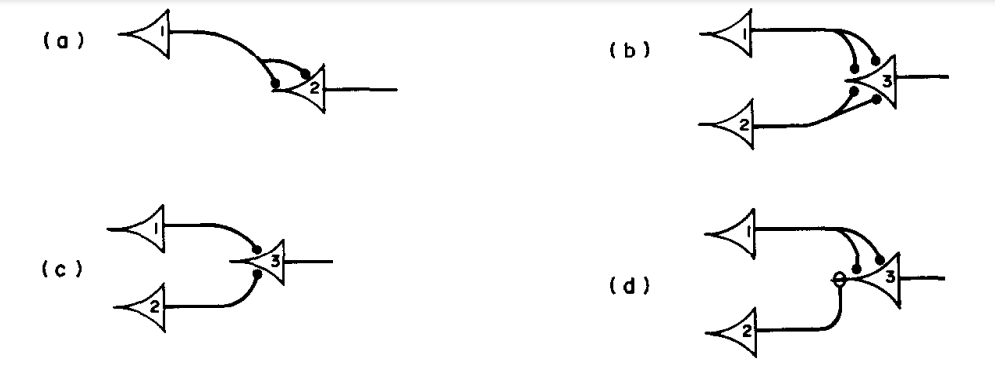

* These neuron only fires when they get two active inputs.

## 4.	Explain the ADALINE network model.

Professor Bernard Widrow and his student Ted Hoff at Stanford University in 1960 developed a single layered neuron called Adaline(adaptive linear neuron). Adaline uses bipolar inputs and output. The weights and biases are adjusted uses delta rule or least mean squares (LMS) or widrow-Hoff rule. Adaline differs from McCulloh-Pitts only in with the modification of weights according to the weighted sum of the inputs `sum_k`. In addition, Adaline differs from the standard Perceptron with respect to the passage of `sum_k` into the activation or transfer function and the output response is used for the modification of weights. It should be noted that the Adaline has only one input unit and activation function is the identity function.

## 5.	What is the constraint of a simple perceptron? Why it may fail with a real-world data set?

In 1957, frank Rosenblatt developed the perceptron at Cornell Aeronautical Laboratory, USA. A Simple Perceptron is a single layer feed-forward NN that uses a supervised learning rule for training. It has three layers in its architecture as sensory neurons, associator neurons and a response neuron which is sometimes considered to be analogous of a retina model. The perceptron developed by Block in 1962 has sensory neurons connected to the associator units by connection links with fixed weights with value +1, 0 or -1 assigned at random. The transfer function for each associator units is a binary step function with arbitrary fixed threshold. Therefore, the signal sent from the associator units to the output unit is either 1 or 0. The transfer function used in the output neuron of the perceptron is:

* $$f(sum_{k}) = \left\{\begin{matrix}
  1\; if sum_{k} > \Theta _{k} \\ 
  0\; if -\Theta_{k}\leq sum_{k} \leq \Theta \\
  -1\; if sum_{k} < -\Theta _{k}
  \end{matrix}\right.$$
  
  
Here it can be concluded that the simple perceptron could only handle linear problems and not handle non-linear problems due to threshold transfer function which becomes its constraint. It will fail in the real world data because not every data is linearly separable using a single best fit line.

## 6.	What is linearly inseparable problem? What is the role of the hidden layer?

In a two-dimensional space if two sets of points can be separated by a single line, then the sets satisfy the property of linear separability and if not they are called linear inseparable problem.

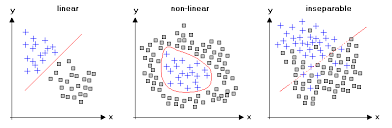


The hidden layers are the layers in a NN where actual data feature extraction happens, these layers are also called as representational layers. The insights about the data happens here and then are forwarded to the next layer and then next and finally in the output layer, the things which the network has learned are seen and then other calculations happen.

## 7.	Explain XOR problem in case of a simple perceptron.

A simple Perceptron works well in case of AND/OR logic problem, have the ability to solve the property of linear separability. However it can not solve for the classification of XOR problem. 

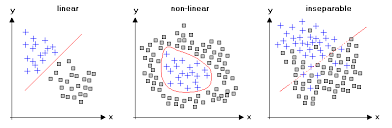


As we can see from the image above that XOR is not linearly separable. This problem was reported by Minsky and Papert in 1969.

## 8.	Design a multi-layer perceptron to implement A XOR B.

In [3]:
import numpy as np
np.random.seed(0)

def sigmoid(x): # Returns values that sums to one.
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(sx):
    # See https://math.stackexchange.com/a/1225116
    return sx * (1 - sx)

# Cost functions.
def cost(predicted, truth):
    return truth - predicted

xor_input = np.array([[0,0], [0,1], [1,0], [1,1]])
xor_output = np.array([[0,1,1,0]]).T

# Lets drop the last row of data and use that as unseen test.
X = xor_input
Y = xor_output

# Define the shape of the weight vector.
num_data, input_dim = X.shape
# Lets set the dimensions for the intermediate layer.
hidden_dim = 5
# Initialize weights between the input layers and the hidden layer.
W1 = np.random.random((input_dim, hidden_dim))

# Define the shape of the output vector. 
output_dim = len(Y.T)
# Initialize weights between the hidden layers and the output layer.
W2 = np.random.random((hidden_dim, output_dim))

num_epochs = 10000
learning_rate = 1.0

for epoch_n in range(num_epochs):
    layer0 = X
    # Forward propagation.
    
    # Inside the perceptron, Step 2. 
    layer1 = sigmoid(np.dot(layer0, W1))
    layer2 = sigmoid(np.dot(layer1, W2))

    # Back propagation (Y -> layer2)
    
    # How much did we miss in the predictions?
    layer2_error = cost(layer2, Y)
    # In what direction is the target value?
    # Were we really close? If so, don't change too much.
    layer2_delta = layer2_error * sigmoid_derivative(layer2)

    
    # Back propagation (layer2 -> layer1)
    # How much did each layer1 value contribute to the layer2 error (according to the weights)?
    layer1_error = np.dot(layer2_delta, W2.T)
    layer1_delta = layer1_error * sigmoid_derivative(layer1)
    
    # update weights
    W2 +=  learning_rate * np.dot(layer1.T, layer2_delta)
    W1 +=  learning_rate * np.dot(layer0.T, layer1_delta)

In [4]:
for x, y in zip(X, Y):
    layer1_prediction = sigmoid(np.dot(W1.T, x)) # Feed the unseen input into trained W.
    prediction = layer2_prediction = sigmoid(np.dot(W2.T, layer1_prediction)) # Feed the unseen input into trained W.
    print(int(prediction > 0.5), y)

0 [0]
1 [1]
1 [1]
0 [0]


## 9.	Explain the single-layer feed forward architecture of ANN.

A single layer net has one layer of connection weights. In the typical single-layer net, the input units are fully connected to output units but are not connected to other input units, and the output units are not connected to other output units. There is only forward connection and no backward connection so this network is called feed forward architecture.


![Single layer NN](https://www.researchgate.net/profile/Fabio-Stella-3/publication/215695281/figure/fig3/AS:667587834810369@1536176751105/Single-layer-feedforward-neural-network-a-single-layer-FNN-consisting-of-I-input.png)

## 10.	Explain the competitive network architecture of ANN.

A competitive layer forms a part of large number of NNs. Typically, the interconnection between neurons in the competitive layer of these competitive NNs are rarely shown in the architectural diagrams. The competitive connections have weights of `- alpha`. The operation is based on winner-takes-all competition. One example for the competitive NN is the one developed by Lippman in 1987, which is called MAXNET.  

![my_image](https://www.researchgate.net/profile/Devrim_Unay/publication/239550445/figure/fig27/AS:669395181375493@1536607656660/Figure-A7-Architecture-of-a-competitive-neural-network-Lateral-connections-are_Q320.jpg)



## 11.	Consider a multi-layer feed forward neural network. Enumerate and explain steps in the backpropagation algorithm used to train the network.

Let us consider the three-layer network, where all activation functions are logistic functions. It is important to note that backpropagation can be applied to an ANN with any number of hidden layers. The training objective is to adjust the weights so that the application of a set of inputs produces the desired outputs. To accomplish, this network is usually trained with a large number of input-output pairs. The training procedure is given as follows:

Step 1: Generate the weights randomly to small random values (both positive and negative) to ensure that the network is not saturated by large values of weights (if all weights start at equal values and the desired performance requires unequal weights, the network would not train at all).

Step 2: Choose a training pair from the training set.

Step 3: Apply the input vector to network output.

Step 4: Calculate the network output.

Step 5: Calculate the error, the difference between the network output and the desired output.

Step 6: Adjust the weights of the network in a way that minimizes this error.

Step 7: Repeat steps 2-6 for each pair of input-output in the training set until the error for the entire system is acceptably low.

Training of a backpropagation neural network (BPNN) involves two passes. In the forward pass, the input signal moves forward from the network input to the output. In the backward pass, the calculated error signals propagate backward through the network, where they are used to adjust the weights. The calculation of the output is carried out, layer by layer, in the forward direction. The output of one layer is the input to the next layer like feedback. In the reverse pass, the weights of the output neuron layer are adjusted first since the target value of each output neuron is available to guide the adjustment of the associated weights using the delta rule. Next, we adjust the weights of the middle layers. As the middle-layer neurons have no target values, it makes the problem complex.

Hence, the training is more complicated, because the error must be propagated back through the network, including the non-linear functions, layer by layer. The number of hidden units depends on the number of input units.  

## 12.	What are the advantages and disadvantages of neural networks?

Advantages of neural network:

1. Store information on the entire network
2. Good fault tolerance
3. The ability to work with insufficient Knowledge
4. The ability of parallel processing

Disadvantages of neural network:

1. Highly Hardware dependent
2. Assurance of proper network structure
3. Unexplained functioning of the network
4. The duration of the network is unknown
5. A large amount of data is always required

## 13.	Write short notes on any two of the following:
1.	Biological neuron
2.	ReLU function
3.	Single-layer feed forward ANN
4.	Gradient descent
5.	Recurrent networks


1) ReLU function

---


The rectified linear unit (ReLU) activation function activates a node only if the input is above zero. If the input is below zero, the output is always zero. But when the inputis higher than zero, it has a linear relationship with the output variable. The ReLU function is represented as follows:

$$f(x)=max(0,x)$$

![ReLU Function](https://pytorch.org/docs/stable/_images/ReLU.png)

At the time of writing, ReLU is considered the state-of-the-art activation function because it works well in many different situations, and it tends to train better than sigmoid and tanh in hidden layers.

Here is how `ReLU` is implemented in Python:

def relu(x):

    if x < 0:
    
       return 0
     
    else:
    
return x

2. Gradient Descent
---
The simplest algorithm for iterative minimization of differentiable functions is known as just **gradient descent**.
Recall that the gradient of a function is defined as the vector of partial derivatives:

$$\nabla f(x) =  [{\partial{f}{x_1}, \partial{f}{x_2}, \ldots, \partial{f}{x_n}}]$$

and that the gradient of a function always points towards the direction of maximal increase at that point.

Equivalently, it points *away* from the direction of maximum decrease - thus, if we start at any point, and keep moving in the direction of the negative gradient, we will eventually reach a local minimum.

This simple insight leads to the Gradient Descent algorithm. Outlined algorithmically, it looks like this:

1. Pick a point $x_0$ as your initial guess.
2. Compute the gradient at your current guess:
$v_i = \nabla f(x_i)$
3. Move by $\alpha$ (your step size) in the direction of that gradient:
$x_{i+1} = x_i + \alpha v_i$
4. Repeat steps 1-3 until your function is close enough to zero (until $f(x_i) < \varepsilon$ for some small tolerance $\varepsilon$)

Note that the step size, $\alpha$, is simply a parameter of the algorithm and has to be fixed in advance. 

![Gradient descent trajectory](https://ml-cheatsheet.readthedocs.io/en/latest/_images/gradient_descent_demystified.png)